In [1]:
import pandas as pd
import numpy as np
import os
import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from IPython.display import Audio

In [2]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from sklearn.model_selection import train_test_split

# Exploring different properties of Librosa

In [3]:
import librosa
audio_path = 'sample-000000.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))


<class 'numpy.ndarray'> <class 'int'>


In [4]:
librosa.load(audio_path, sr=44100)

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 44100)

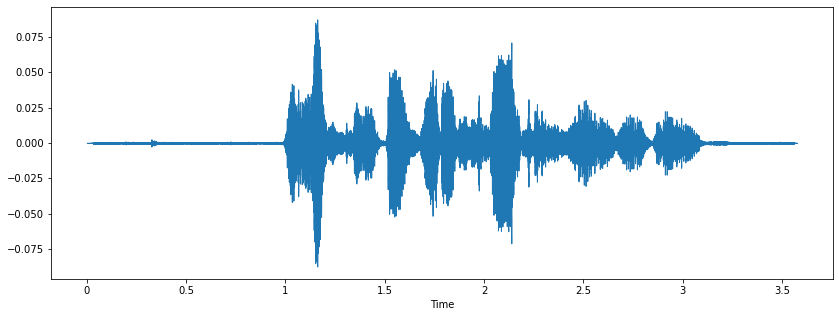

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

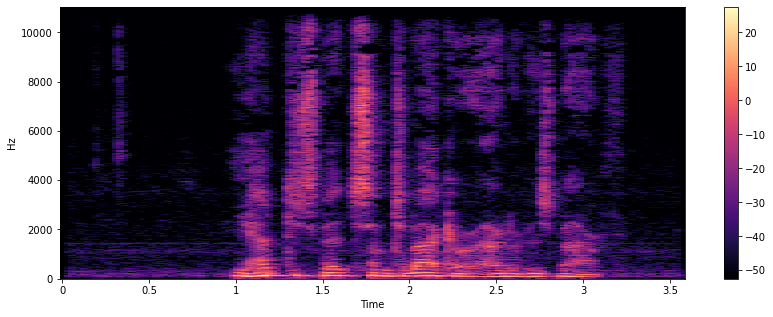

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

(20, 155)


<ipython-input-7-9a7ee64fd739>:1: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


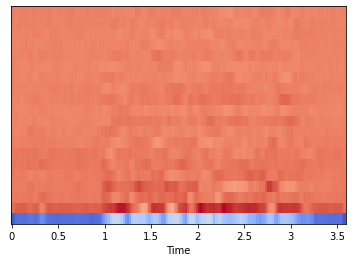

In [7]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

<ipython-input-8-c08940fe345d>:1: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma= librosa.feature.chroma_stft(x, sr=sr)


(12, 155)


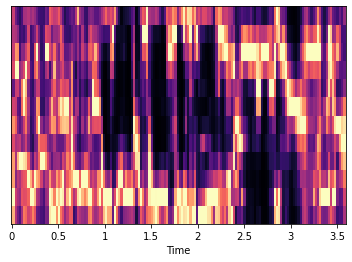

In [8]:
chroma= librosa.feature.chroma_stft(x, sr=sr)
print(chroma.shape)
librosa.display.specshow(chroma, sr=sr, x_axis='time')

(7, 155)


<ipython-input-9-c144fb631a70>:1: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_contrast=librosa.feature.spectral_contrast(x, sr=sr)


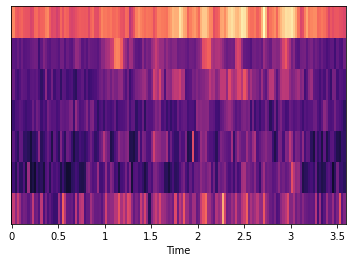

In [9]:
spectral_contrast=librosa.feature.spectral_contrast(x, sr=sr)
print(spectral_contrast.shape)
librosa.display.specshow(spectral_contrast, sr=sr, x_axis='time')

In [10]:
librosa.feature.melspectrogram(x, sr=sr)
print(melspectrogram.shape)
librosa.display.specshow(melspectrogram, sr=sr, x_axis='time')

<ipython-input-10-a9c81230df74>:1: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.feature.melspectrogram(x, sr=sr)


NameError: name 'melspectrogram' is not defined

In [ ]:
# np.load('features.npy')

In [11]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
return result

NameError: name 'mel' is not defined

# Data Exploration and Preparation


In [12]:
paths_fear = []
labels_fear = []

dir_list = os.listdir("OAF_Fear")
# print(dir_list)
for dirname, _, filenames in os.walk("OAF_Fear"):
    for filename in dir_list:
        paths_fear.append(os.path.join(dirname, filename))
        labels_fear.append("fear")
#         labels_fear = filename.split('_')[-1]
#         labels_fear = labels_fear.split('.')[0]
#         labels_fear.append(labels_fear.lower())
# print(paths_fear)
# print(labels_fear)
len(paths_fear)
# len(labels_fear)
# print('Dataset is Loaded')

200

In [13]:
paths_happy = []
labels_happy = []

dir_list = os.listdir("OAF_happy")
# print(dir_list)
for dirname, _, filenames in os.walk("OAF_happy"):
    for filename in dir_list:
        paths_happy.append(os.path.join(dirname, filename))
        labels_happy.append("happy")
#         labels_fear = filename.split('_')[-1]
#         labels_fear = labels_fear.split('.')[0]
#         labels_fear.append(labels_fear.lower())
# print(paths_happy)
print(labels_happy)
# print('Dataset is Loaded')

['happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 

In [14]:
paths_disgust= []
labels_disgust = []

dir_list = os.listdir("OAF_disgust")
# print(dir_list)
for dirname, _, filenames in os.walk("OAF_disgust"):
    for filename in dir_list:
        paths_disgust.append(os.path.join(dirname, filename))
        labels_disgust.append("disgust")
#         labels_fear = filename.split('_')[-1]
#         labels_fear = labels_fear.split('.')[0]
#         labels_fear.append(labels_fear.lower())
print(paths_disgust)
# print(labels_fear)
# print('Dataset is Loaded')

['OAF_disgust\\OAF_back_disgust.wav', 'OAF_disgust\\OAF_bar_disgust.wav', 'OAF_disgust\\OAF_base_disgust.wav', 'OAF_disgust\\OAF_bath_disgust.wav', 'OAF_disgust\\OAF_bean_disgust.wav', 'OAF_disgust\\OAF_beg_disgust.wav', 'OAF_disgust\\OAF_bite_disgust.wav', 'OAF_disgust\\OAF_boat_disgust.wav', 'OAF_disgust\\OAF_bone_disgust.wav', 'OAF_disgust\\OAF_book_disgust.wav', 'OAF_disgust\\OAF_bought_disgust.wav', 'OAF_disgust\\OAF_burn_disgust.wav', 'OAF_disgust\\OAF_cab_disgust.wav', 'OAF_disgust\\OAF_calm_disgust.wav', 'OAF_disgust\\OAF_came_disgust.wav', 'OAF_disgust\\OAF_cause_disgust.wav', 'OAF_disgust\\OAF_chain_disgust.wav', 'OAF_disgust\\OAF_chair_disgust.wav', 'OAF_disgust\\OAF_chalk_disgust.wav', 'OAF_disgust\\OAF_chat_disgust.wav', 'OAF_disgust\\OAF_check_disgust.wav', 'OAF_disgust\\OAF_cheek_disgust.wav', 'OAF_disgust\\OAF_chief_disgust.wav', 'OAF_disgust\\OAF_choice_disgust.wav', 'OAF_disgust\\OAF_cool_disgust.wav', 'OAF_disgust\\OAF_dab_disgust.wav', 'OAF_disgust\\OAF_date_disgust

In [15]:
paths_neutral = []
labels_neutral = []

dir_list = os.listdir("OAF_neutral")
# print(dir_list)
for dirname, _, filenames in os.walk("OAF_neutral"):
    for filename in dir_list:
        paths_neutral.append(os.path.join(dirname, filename))
        labels_neutral.append("neutral")
        
#         labels_fear = filename.split('_')[-1]
#         labels_fear = labels_fear.split('.')[0]
#         labels_fear.append(labels_fear.lower())
print(paths_neutral)
# print(labels_fear)
# print('Dataset is Loaded')

['OAF_neutral\\OAF_back_neutral.wav', 'OAF_neutral\\OAF_bar_neutral.wav', 'OAF_neutral\\OAF_base_neutral.wav', 'OAF_neutral\\OAF_bath_neutral.wav', 'OAF_neutral\\OAF_bean_neutral.wav', 'OAF_neutral\\OAF_beg_neutral.wav', 'OAF_neutral\\OAF_boat_neutral.wav', 'OAF_neutral\\OAF_bone_neutral.wav', 'OAF_neutral\\OAF_book_neutral.wav', 'OAF_neutral\\OAF_bought_neutral.wav', 'OAF_neutral\\OAF_burn_neutral.wav', 'OAF_neutral\\OAF_cab_neutral.wav', 'OAF_neutral\\OAF_calm_neutral.wav', 'OAF_neutral\\OAF_came_neutral.wav', 'OAF_neutral\\OAF_cause_neutral.wav', 'OAF_neutral\\OAF_chain_neutral.wav', 'OAF_neutral\\OAF_chair_neutral.wav', 'OAF_neutral\\OAF_chalk_neutral.wav', 'OAF_neutral\\OAF_chat_neutral.wav', 'OAF_neutral\\OAF_check_neutral.wav', 'OAF_neutral\\OAF_cheek_neutral.wav', 'OAF_neutral\\OAF_chief_neutral.wav', 'OAF_neutral\\OAF_choice_neutral.wav', 'OAF_neutral\\OAF_cool_neutral.wav', 'OAF_neutral\\OAF_dab_neutral.wav', 'OAF_neutral\\OAF_date_neutral.wav', 'OAF_neutral\\OAF_dead_neutral

In [16]:
paths_angry = []
labels_angry = []

dir_list = os.listdir("OAF_angry")
# print(dir_list)
for dirname, _, filenames in os.walk("OAF_angry"):
    for filename in dir_list:
        paths_angry.append(os.path.join(dirname, filename))
        labels_angry.append("angry")
#         labels_fear = filename.split('_')[-1]
#         labels_fear = labels_fear.split('.')[0]
#         labels_fear.append(labels_fear.lower())
# print(paths_angry)
print(labels_angry)
# print('Dataset is Loaded') 

['angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 

In [17]:
paths_sad = []
labels_sad = []

dir_list = os.listdir("OAF_Sad")
# print(dir_list)
for dirname, _, filenames in os.walk("OAF_Sad"):
    for filename in dir_list:
        paths_sad.append(os.path.join(dirname, filename))
        labels_sad.append("sad")
#         labels_fear = filename.split('_')[-1]
#         labels_fear = labels_fear.split('.')[0]
#         labels_fear.append(labels_fear.lower())
# print(paths_sad)
print(labels_sad)
# print('Dataset is Loaded') 

['sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad'

In [18]:
paths=[]
paths.append(paths_fear)
paths.append(paths_happy)
paths.append(paths_sad)
paths.append(paths_neutral)
paths.append(paths_disgust)
paths.append(paths_angry)
print(paths)


[['OAF_Fear\\OAF_back_fear.wav', 'OAF_Fear\\OAF_bar_fear.wav', 'OAF_Fear\\OAF_base_fear.wav', 'OAF_Fear\\OAF_bath_fear.wav', 'OAF_Fear\\OAF_bean_fear.wav', 'OAF_Fear\\OAF_beg_fear.wav', 'OAF_Fear\\OAF_bite_fear.wav', 'OAF_Fear\\OAF_boat_fear.wav', 'OAF_Fear\\OAF_bone_fear.wav', 'OAF_Fear\\OAF_book_fear.wav', 'OAF_Fear\\OAF_bought_fear.wav', 'OAF_Fear\\OAF_burn_fear.wav', 'OAF_Fear\\OAF_cab_fear.wav', 'OAF_Fear\\OAF_calm_fear.wav', 'OAF_Fear\\OAF_came_fear.wav', 'OAF_Fear\\OAF_cause_fear.wav', 'OAF_Fear\\OAF_chain_fear.wav', 'OAF_Fear\\OAF_chair_fear.wav', 'OAF_Fear\\OAF_chalk_fear.wav', 'OAF_Fear\\OAF_chat_fear.wav', 'OAF_Fear\\OAF_check_fear.wav', 'OAF_Fear\\OAF_cheek_fear.wav', 'OAF_Fear\\OAF_chief_fear.wav', 'OAF_Fear\\OAF_choice_fear.wav', 'OAF_Fear\\OAF_cool_fear.wav', 'OAF_Fear\\OAF_dab_fear.wav', 'OAF_Fear\\OAF_date_fear.wav', 'OAF_Fear\\OAF_dead_fear.wav', 'OAF_Fear\\OAF_death_fear.wav', 'OAF_Fear\\OAF_deep_fear.wav', 'OAF_Fear\\OAF_dime_fear.wav', 'OAF_Fear\\OAF_dip_fear.wav',

In [19]:
labels=[]
labels.append(labels_fear)
labels.append(labels_happy)
labels.append(labels_sad)
labels.append(labels_neutral)
labels.append(labels_disgust)
labels.append(labels_angry)
print(labels)

[['fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear'

In [20]:
df = pd.DataFrame()
df['speech'] = paths_fear
df['label'] = labels_fear
df1 = pd.DataFrame()
df1['speech'] = paths_happy
df1['label'] = labels_happy
df2 = pd.DataFrame()
df2['speech'] = paths_sad
df2['label'] = labels_sad
df3 = pd.DataFrame()
df3['speech'] = paths_angry
df3['label'] = labels_angry
df4 = pd.DataFrame()
df4['speech'] = paths_disgust
df4['label'] = labels_disgust
df5 = pd.DataFrame()
df5['speech'] = paths_fear
df5['label'] = labels_fear
df6 = pd.DataFrame()
df6['speech'] = paths_neutral
df6['label'] = labels_neutral
# df7= pd.DataFrame()
# df7['speech'] = paths_disgust
# df7['label'] = labels_disgust

dff=pd.concat([df, df1, df2, df3, df4, df6])
# dff=df.append(df1)
# dff1=dff.append(df2)
# dff2=dff1.append(df3)
# dff3=dff2.append(df4)
# # dff4=dff3.append(df5)
# dff5=dff3.append(df6)
# # dff6=dff5.append(df7)
dff= dff.reset_index()
print(dff.loc[[200]])








     index                        speech  label
200      0  OAF_happy\OAF_back_happy.wav  happy


C:\Users\laksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

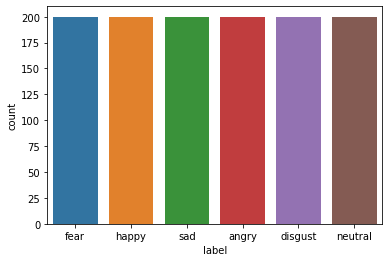

In [21]:
import seaborn as sns

sns.countplot(dff['label'])

In [22]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

def mfcc(data,sr,emotion):
    mfccs = librosa.feature.mfcc(data, sr=sr)
#     print(mfccs.shape)
    #Displaying  the MFCCs:
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')

def chroma(data,sr,emotion):
    chroma= librosa.feature.chroma_stft(data, sr=sr)
    print(chroma.shape)
    librosa.display.specshow(chroma, sr=sr, x_axis='time')


In [23]:
emotion = 'happy'
path = np.array(df['speech'][df['label']=='happy'][202])
print(path)
data, sampling_rate = librosa.load(path)


# chroma(data,sampling_rate,emotion)
# Audio(path)

KeyError: 202

In [24]:
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

NameError: name 'data' is not defined

In [25]:
mfcc(data, sampling_rate, emotion)

NameError: name 'data' is not defined

OAF_Fear\OAF_back_fear.wav


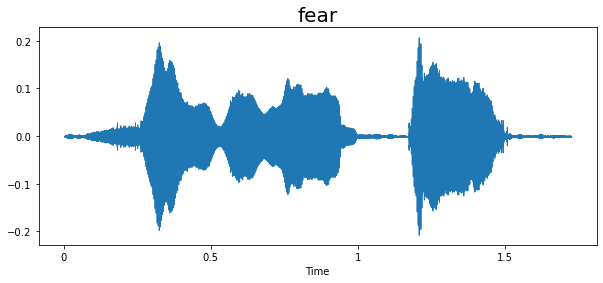

<ipython-input-22-f2f0135668c0>:16: FutureWarning: Pass y=[-2.8841856e-07 -1.0423521e-04 -1.0487970e-04 ...  1.0947207e-04
  1.1054759e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(data, sr=sr)
<ipython-input-22-f2f0135668c0>:22: FutureWarning: Pass y=[-2.8841856e-07 -1.0423521e-04 -1.0487970e-04 ...  1.0947207e-04
  1.1054759e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma= librosa.feature.chroma_stft(data, sr=sr)


(12, 75)


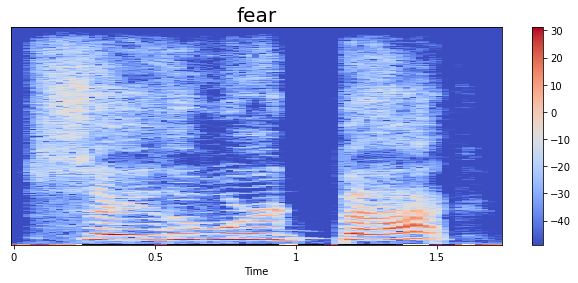

In [26]:
emotion = 'fear'
path = np.array(dff['speech'][dff['label']==emotion])[0]
print(path)
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
mfcc(data, sampling_rate, emotion)
chroma(data,sampling_rate,emotion)


Audio(path)


OAF_Sad\OAF_back_sad.wav


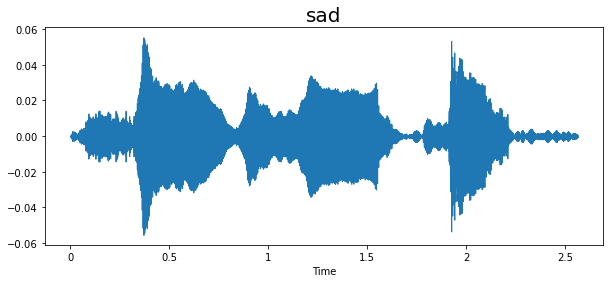

(12, 111)


<ipython-input-22-f2f0135668c0>:16: FutureWarning: Pass y=[-1.0468953e-05 -1.7632528e-05 -5.7582954e-05 ...  6.3098349e-05
  1.2449350e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(data, sr=sr)
<ipython-input-22-f2f0135668c0>:22: FutureWarning: Pass y=[-1.0468953e-05 -1.7632528e-05 -5.7582954e-05 ...  6.3098349e-05
  1.2449350e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma= librosa.feature.chroma_stft(data, sr=sr)


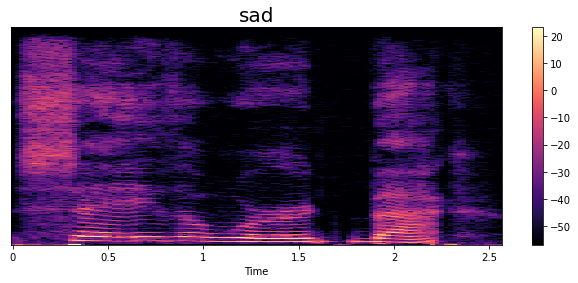

In [27]:
emotion = 'sad'
path = np.array(dff['speech'][dff['label']==emotion])[0]
print(path)
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
mfcc(data, sampling_rate, emotion)
chroma(data,sampling_rate,emotion)


Audio(path)

OAF_neutral\OAF_back_neutral.wav


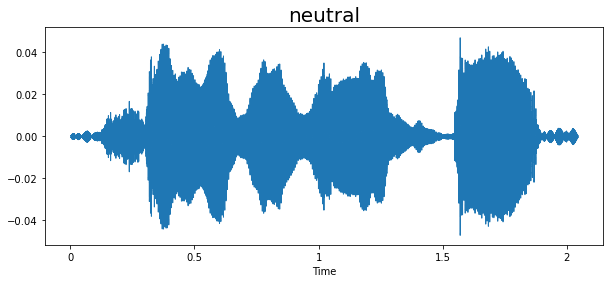

(12, 89)


<ipython-input-22-f2f0135668c0>:16: FutureWarning: Pass y=[-3.4720515e-06  4.0753355e-05  5.3738426e-05 ... -8.6702588e-05
 -9.6820193e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(data, sr=sr)
<ipython-input-22-f2f0135668c0>:22: FutureWarning: Pass y=[-3.4720515e-06  4.0753355e-05  5.3738426e-05 ... -8.6702588e-05
 -9.6820193e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma= librosa.feature.chroma_stft(data, sr=sr)


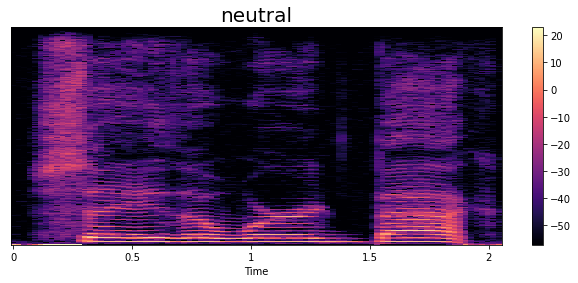

In [28]:
emotion = 'neutral'
path = np.array(dff['speech'][dff['label']==emotion])[0]
print(path)
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
mfcc(data, sampling_rate, emotion)
chroma(data,sampling_rate,emotion)


Audio(path)

OAF_happy\OAF_back_happy.wav


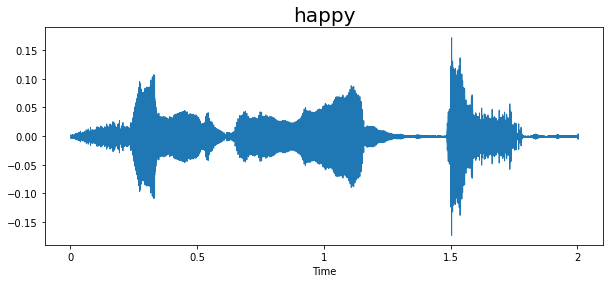

(12, 87)


<ipython-input-22-f2f0135668c0>:16: FutureWarning: Pass y=[ 9.5519827e-05 -1.3329886e-03 -2.5686934e-03 ...  2.8270874e-03
  1.4279287e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(data, sr=sr)
<ipython-input-22-f2f0135668c0>:22: FutureWarning: Pass y=[ 9.5519827e-05 -1.3329886e-03 -2.5686934e-03 ...  2.8270874e-03
  1.4279287e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma= librosa.feature.chroma_stft(data, sr=sr)


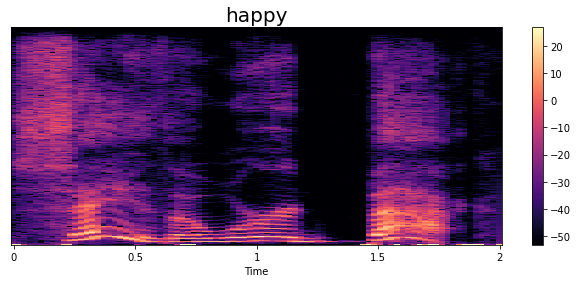

In [29]:
emotion = 'happy'
path = np.array(dff['speech'][dff['label']==emotion])[0]
print(path)
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
mfcc(data, sampling_rate, emotion)
chroma(data,sampling_rate,emotion)


Audio(path)

In [44]:
# train, test = train_test_split(dff, test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(dff['speech'], dff['label'],test_size=0.2)
x_test

176            OAF_Fear\OAF_ton_fear.wav
178          OAF_Fear\OAF_tough_fear.wav
235         OAF_happy\OAF_doll_happy.wav
208         OAF_happy\OAF_bone_happy.wav
570            OAF_Sad\OAF_third_sad.wav
                      ...               
265         OAF_happy\OAF_hush_happy.wav
1080    OAF_neutral\OAF_laud_neutral.wav
555            OAF_Sad\OAF_shout_sad.wav
792        OAF_angry\OAF_white_angry.wav
486             OAF_Sad\OAF_life_sad.wav
Name: speech, Length: 240, dtype: object

In [205]:
def extract_feature(filename, mfcc, chroma):
#     y= filename.read(dtype="float32")
    y, sr = librosa.load(filename, duration=3, offset=0.5, dtype="float32")
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
        return mfccs
#         result=np.hstack((result, mfccs))
    if chroma:
        stft=np.abs(librosa.stft(y))
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
        return chroma
#         result=np.hstack((result, chroma))
#     if mel:
#         mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
#         return mel
#         result=np.hstack((result, mel))
# return result
    
# def extract_mfcc(filename):
#     y, sr = librosa.load(filename, duration=3, offset=0.5)
#     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
#     return mfcc

# extract_feature(df['speech'][0],mfcc,chroma)
X_features = x_train.apply(lambda x: extract_feature(x,mfcc,chroma))
X_features

1128    [-530.66815, 107.87854, 23.052448, 5.231699, 1...
379     [-485.30814, 108.37123, 19.886644, -17.380342,...
354     [-441.95627, 86.96137, 11.84038, -5.3248076, 2...
1031    [-537.2529, 82.17508, 16.959398, 14.904276, 21...
1011    [-490.38025, 94.08948, 6.7180085, -0.5276175, ...
                              ...                        
1115    [-526.352, 76.11344, 22.592653, 19.540329, 18....
1141    [-531.02, 115.058754, 32.19294, -12.97766, 10....
1162    [-504.3888, 90.35104, 16.21777, -3.3868465, 13...
482     [-536.65857, 107.45839, 37.687668, 23.300686, ...
840     [-441.0582, 91.23336, 0.38111347, -15.6442795,...
Name: speech, Length: 960, dtype: object

In [206]:
X = [x for x in X_features]
X = np.array(X)
X

array([[-5.3066815e+02,  1.0787854e+02,  2.3052448e+01, ...,
         4.5475674e+01,  3.2281857e+01,  1.6573671e+01],
       [-4.8530814e+02,  1.0837123e+02,  1.9886644e+01, ...,
         9.5995274e+00,  9.0484447e+00,  1.0872589e+01],
       [-4.4195627e+02,  8.6961372e+01,  1.1840380e+01, ...,
         8.1052723e+00,  5.4636993e+00,  1.0667543e+01],
       ...,
       [-5.0438879e+02,  9.0351044e+01,  1.6217770e+01, ...,
         3.5281399e+01,  1.2717763e+01,  4.9550679e-01],
       [-5.3665857e+02,  1.0745839e+02,  3.7687668e+01, ...,
         2.3884056e+01,  2.1503078e+01,  1.6780451e+01],
       [-4.4105820e+02,  9.1233360e+01,  3.8111347e-01, ...,
         3.5851109e+00,  5.7797480e+00,  6.5268068e+00]], dtype=float32)

In [207]:
X = np.expand_dims(X, -1)
X.shape


(960, 40, 1)

In [208]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder()
# y = enc.fit_transform(dff[['label']])
# # y[199]
# y = y.toarray()
# y
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = np_utils.to_categorical(lb.fit_transform(y_train))
y

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [49]:
dff[['label']]

,label
0,fear
1,fear
2,fear
3,fear
4,fear
...,...
1195,neutral
1196,neutral
1197,neutral
1198,neutral


# Model 1- RNN & LSTM(training accuracy- 97.02% & validation accuracy-96.88%

In [50]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(128, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 6)                 198       
                                                                 
Total params: 77,094
Trainable params: 77,094
Non-trai

In [51]:
history = model.fit(X, y, validation_split=0.3, epochs=100, batch_size=512, shuffle=True)
history1=model.save("sr.h5",history)

Epoch 1/100
2/2 [==============================] - 3s 764ms/step - loss: 1.7998 - accuracy: 0.2128 - val_loss: 1.7113 - val_accuracy: 0.3194
Epoch 2/100
2/2 [==============================] - 0s 161ms/step - loss: 1.6995 - accuracy: 0.3586 - val_loss: 1.6315 - val_accuracy: 0.4167
Epoch 3/100
2/2 [==============================] - 0s 189ms/step - loss: 1.6197 - accuracy: 0.4539 - val_loss: 1.5454 - val_accuracy: 0.4931
Epoch 4/100
2/2 [==============================] - 0s 146ms/step - loss: 1.5440 - accuracy: 0.4955 - val_loss: 1.4499 - val_accuracy: 0.5556
Epoch 5/100
2/2 [==============================] - 0s 188ms/step - loss: 1.4626 - accuracy: 0.5298 - val_loss: 1.3423 - val_accuracy: 0.6146
Epoch 6/100
2/2 [==============================] - 0s 150ms/step - loss: 1.3558 - accuracy: 0.5848 - val_loss: 1.2251 - val_accuracy: 0.6424
Epoch 7/100
2/2 [==============================] - 0s 156ms/step - loss: 1.2522 - accuracy: 0.6027 - val_loss: 1.1112 - val_accuracy: 0.6493
Epoch 8/100
2

Epoch 59/100
2/2 [==============================] - 0s 229ms/step - loss: 0.0510 - accuracy: 0.9911 - val_loss: 0.0939 - val_accuracy: 0.9757
Epoch 60/100
2/2 [==============================] - 0s 163ms/step - loss: 0.0572 - accuracy: 0.9836 - val_loss: 0.0969 - val_accuracy: 0.9722
Epoch 61/100
2/2 [==============================] - 0s 221ms/step - loss: 0.0470 - accuracy: 0.9911 - val_loss: 0.1027 - val_accuracy: 0.9757
Epoch 62/100
2/2 [==============================] - 1s 184ms/step - loss: 0.0340 - accuracy: 0.9955 - val_loss: 0.1123 - val_accuracy: 0.9722
Epoch 63/100
2/2 [==============================] - 0s 127ms/step - loss: 0.0577 - accuracy: 0.9836 - val_loss: 0.1079 - val_accuracy: 0.9722
Epoch 64/100
2/2 [==============================] - 0s 107ms/step - loss: 0.0344 - accuracy: 0.9926 - val_loss: 0.0919 - val_accuracy: 0.9792
Epoch 65/100
2/2 [==============================] - 0s 132ms/step - loss: 0.0365 - accuracy: 0.9940 - val_loss: 0.0990 - val_accuracy: 0.9688
Epoch 

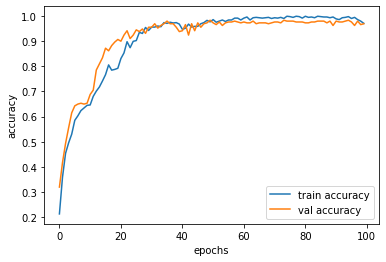

In [52]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

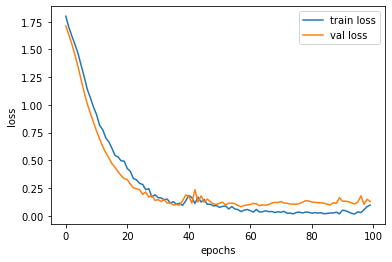

In [53]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [54]:
from tensorflow.keras.models import load_model
model=load_model('sr.h5')

In [77]:
X_features1 = x_test.apply(lambda x: extract_feature(x,mfcc,chroma))
X_features1

# pred= predshape(40,1)
# pred

pred= [p for p in X_features1]
P = np.array(pred)
 

P.shape

# # # pred.shape
# pred = np.expand_dims(pred, -1)
# pred
# preds=model.predict(P)
# preds
# preds1=preds.argmax(axis=1)
# preds1

(240, 40)

In [56]:
P

array([[-4.3066531e+02,  7.9407059e+01,  1.3899033e+01, ...,
        -1.0949769e+00, -6.8734689e+00,  9.0661556e-01],
       [-4.5533853e+02,  7.5902611e+01,  6.2239528e+00, ...,
         9.5132828e-02, -1.3522168e+00,  3.5245094e+00],
       [-4.7497919e+02,  1.1084486e+02,  3.0773487e+01, ...,
         8.5791464e+00,  1.0867273e+01,  1.5221524e+01],
       ...,
       [-5.2562030e+02,  9.0622154e+01,  1.6804848e+01, ...,
         9.8948832e+00,  1.3941475e+00,  1.9024274e+00],
       [-4.5061520e+02,  8.2494194e+01, -1.1601023e+01, ...,
         5.3929296e+00, -1.6140954e+00, -2.4172633e+00],
       [-5.2824982e+02,  9.6811615e+01,  2.7121489e+01, ...,
         1.3651490e+01,  1.3239011e+01,  1.7541021e+01]], dtype=float32)

In [57]:
preds=model.predict(P)
preds

array([[5.44384466e-06, 3.68218754e-11, 9.99994278e-01, 5.87441901e-11,
        2.31394139e-07, 6.06949797e-08],
       [1.15512557e-05, 3.85119076e-10, 9.99987364e-01, 6.33400943e-10,
        7.29491092e-07, 3.60585375e-07],
       [1.79478757e-05, 4.97036264e-04, 3.36490712e-06, 9.99310493e-01,
        8.74772113e-08, 1.71066640e-04],
       ...,
       [5.24096649e-05, 2.52862374e-04, 2.41463076e-05, 1.98319744e-04,
        1.04357765e-04, 9.99367893e-01],
       [9.99906421e-01, 1.51475945e-07, 9.29522648e-05, 2.96400486e-07,
        3.77982303e-08, 1.20923900e-07],
       [1.56271869e-06, 2.53219841e-05, 2.47691924e-06, 2.38840039e-05,
        1.73726348e-05, 9.99929309e-01]], dtype=float32)

In [58]:
preds1=preds.argmax(axis=1)
preds1

array([2, 2, 3, 3, 5, 5, 1, 5, 0, 5, 4, 5, 1, 4, 3, 0, 2, 5, 1, 2, 2, 0,
       5, 2, 1, 0, 1, 2, 0, 4, 0, 2, 0, 1, 1, 5, 4, 3, 3, 2, 2, 4, 0, 3,
       2, 5, 3, 4, 5, 3, 5, 4, 3, 3, 4, 0, 2, 3, 5, 5, 0, 4, 2, 4, 4, 4,
       3, 5, 2, 5, 1, 0, 1, 2, 0, 5, 3, 5, 2, 5, 3, 4, 0, 3, 3, 2, 4, 4,
       3, 5, 5, 1, 0, 4, 4, 4, 1, 4, 2, 4, 3, 2, 0, 0, 1, 4, 1, 3, 4, 2,
       1, 0, 0, 2, 3, 5, 4, 1, 5, 1, 0, 1, 5, 1, 4, 3, 0, 3, 2, 5, 3, 1,
       0, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 2, 0, 3, 5, 3, 0, 5, 4, 1, 2,
       2, 3, 1, 2, 4, 0, 4, 0, 4, 1, 4, 2, 3, 5, 4, 5, 5, 4, 0, 1, 0, 4,
       4, 5, 3, 2, 5, 5, 1, 5, 4, 5, 4, 1, 5, 3, 0, 1, 5, 4, 1, 2, 4, 3,
       3, 4, 1, 0, 1, 3, 4, 1, 1, 2, 2, 5, 1, 5, 2, 4, 1, 0, 3, 1, 3, 2,
       5, 5, 3, 0, 5, 4, 2, 3, 4, 5, 0, 4, 1, 1, 4, 3, 4, 5, 0, 5],
      dtype=int64)

In [59]:
abc = preds1.astype(int).flatten()
abc
predictions = (lb.inverse_transform((abc)))
predictions

# abc1=abc.reshape(1, -1)
# abc1
# predictions = (enc.inverse_transform((abc)))


array(['fear', 'fear', 'happy', 'happy', 'sad', 'sad', 'disgust', 'sad',
       'angry', 'sad', 'neutral', 'sad', 'disgust', 'neutral', 'happy',
       'angry', 'fear', 'sad', 'disgust', 'fear', 'fear', 'angry', 'sad',
       'fear', 'disgust', 'angry', 'disgust', 'fear', 'angry', 'neutral',
       'angry', 'fear', 'angry', 'disgust', 'disgust', 'sad', 'neutral',
       'happy', 'happy', 'fear', 'fear', 'neutral', 'angry', 'happy',
       'fear', 'sad', 'happy', 'neutral', 'sad', 'happy', 'sad',
       'neutral', 'happy', 'happy', 'neutral', 'angry', 'fear', 'happy',
       'sad', 'sad', 'angry', 'neutral', 'fear', 'neutral', 'neutral',
       'neutral', 'happy', 'sad', 'fear', 'sad', 'disgust', 'angry',
       'disgust', 'fear', 'angry', 'sad', 'happy', 'sad', 'fear', 'sad',
       'happy', 'neutral', 'angry', 'happy', 'happy', 'fear', 'neutral',
       'neutral', 'happy', 'sad', 'sad', 'disgust', 'angry', 'neutral',
       'neutral', 'neutral', 'disgust', 'neutral', 'fear', 'neutral'

# Checking result accuracy

In [60]:
x_test.to_numpy()
# y_test

array(['OAF_Fear\\OAF_ton_fear.wav', 'OAF_Fear\\OAF_tough_fear.wav',
       'OAF_happy\\OAF_doll_happy.wav', 'OAF_happy\\OAF_bone_happy.wav',
       'OAF_Sad\\OAF_third_sad.wav', 'OAF_Sad\\OAF_thought_sad.wav',
       'OAF_disgust\\OAF_phone_disgust.wav', 'OAF_Sad\\OAF_ditch_sad.wav',
       'OAF_angry\\OAF_chalk_angry.wav', 'OAF_Sad\\OAF_rot_sad.wav',
       'OAF_neutral\\OAF_pool_neutral.wav', 'OAF_Sad\\OAF_road_sad.wav',
       'OAF_disgust\\OAF_met_disgust.wav',
       'OAF_neutral\\OAF_numb_neutral.wav',
       'OAF_happy\\OAF_wire_happy.wav', 'OAF_angry\\OAF_sheep_angry.wav',
       'OAF_Fear\\OAF_goal_fear.wav', 'OAF_Sad\\OAF_five_sad.wav',
       'OAF_disgust\\OAF_tape_disgust.wav', 'OAF_Fear\\OAF_moon_fear.wav',
       'OAF_Fear\\OAF_tip_fear.wav', 'OAF_angry\\OAF_bath_angry.wav',
       'OAF_Sad\\OAF_king_sad.wav', 'OAF_Fear\\OAF_mob_fear.wav',
       'OAF_disgust\\OAF_check_disgust.wav',
       'OAF_angry\\OAF_ditch_angry.wav',
       'OAF_disgust\\OAF_lore_disgust.wav',
   

In [61]:
y_test


176        fear
178        fear
235       happy
208       happy
570         sad
         ...   
265       happy
1080    neutral
555         sad
792       angry
486         sad
Name: label, Length: 240, dtype: object

# Predicting result on user input audio through speech recognition

In [193]:
# import required libraries
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv

# Sampling frequency
freq = 44100

# Recording duration
duration = 5

# Start recorder with the given values
# of duration and sample frequency
recording = sd.rec(int(duration * freq),samplerate=freq, channels=2)

# Record audio for the given number of seconds
sd.wait()

# This will convert the NumPy array to an audio
# file with the given sampling frequency
write("recording0.wav", freq, recording)

# Convert the NumPy array to audio file
# wv.write("recording1.wav", recording, freq, sampwidth=2)


# Testing the model on a single file input

In [181]:
testt=extract_feature("YAF_cab_sad.wav",mfcc,chroma)
P = np.array(testt)
 
# P.transpose()
P
X = [x for x in testt]
X = np.array(X)
X.shape
X = np.expand_dims(X, -1)
X.shape
X=np.transpose(X)
X.shape
# preds1=model.predict(P)
# preds1


(1, 40)

In [182]:
P1= P.reshape(40,1)
P1



array([[-3.95620178e+02],
       [ 9.45290451e+01],
       [ 1.02219095e+01],
       [ 2.83699036e+01],
       [-5.83102989e+00],
       [ 1.26204643e+01],
       [ 1.74476051e+00],
       [-1.12888393e+01],
       [ 1.86992347e+00],
       [-1.08856606e+00],
       [-9.89690208e+00],
       [-3.03194237e+00],
       [-1.04955788e+01],
       [ 1.25259428e+01],
       [-9.79538918e+00],
       [-3.46340823e+00],
       [ 2.05046996e-01],
       [-1.90949380e+00],
       [-4.73919773e+00],
       [-4.51420307e+00],
       [-8.08953762e+00],
       [-7.89232588e+00],
       [-6.83343124e+00],
       [ 7.62858987e-01],
       [-4.25529385e+00],
       [ 8.45891571e+00],
       [ 1.79959798e+00],
       [ 5.80321312e-01],
       [-1.84225190e+00],
       [-1.10076582e+00],
       [ 1.07099466e-01],
       [ 1.42017269e+01],
       [ 6.07040882e+00],
       [ 1.04053688e+01],
       [-1.03403650e-01],
       [ 1.69611752e-01],
       [ 1.52045095e+00],
       [ 1.02100878e+01],
       [ 1.2

In [183]:
preds1=model.predict(X)
preds1
# X = np.expand_dims(X, -1)
# X.shape


array([[6.0767256e-06, 4.1379643e-04, 4.9304354e-06, 2.9187079e-04,
        1.2787941e-05, 9.9927062e-01]], dtype=float32)

In [184]:
preds11=preds1.argmax(axis=1)
preds11

array([5], dtype=int64)

In [185]:
ac = preds11.astype(int).flatten()
ac
predictions = (lb.inverse_transform((ac)))
predictions

array(['sad'], dtype=object)

# Predicting emotion of the users voice using speech recognition

In [194]:
testt=extract_feature("recording0.wav",mfcc,chroma)
P = np.array(testt)
 
# P.transpose()
P


array([-5.2078558e+02,  4.1785522e+01,  1.5152140e+01,  1.1004436e+01,
        2.7820275e+00, -1.8920805e+01, -2.7081753e+01, -6.6394496e+00,
       -4.1744552e+00, -8.0370255e+00, -1.3271238e+01, -1.5320814e+01,
       -7.8716493e+00, -1.2599903e+00, -8.8230171e+00, -1.1234496e+01,
       -1.3783048e+01, -4.1385856e+00, -6.1178412e+00,  7.1357095e-01,
       -2.9972150e+00, -1.8898304e+00,  8.5759866e-01,  3.3927889e+00,
        1.3750373e+00,  4.4800767e-01, -1.4103254e+00, -1.7826618e+00,
       -3.6538014e+00, -4.7373233e+00, -8.1318684e+00, -2.4620163e+00,
       -7.3432131e+00, -2.9287353e+00, -6.2063141e+00, -2.5459909e+00,
       -5.5045590e+00,  3.3846229e-01, -1.9836307e+00,  1.5031407e+00],
      dtype=float32)

In [195]:
X = [x for x in testt]
X = np.array(X)
X.shape
X = np.expand_dims(X, -1)
X.shape
X=np.transpose(X)
X



array([[-5.2078558e+02,  4.1785522e+01,  1.5152140e+01,  1.1004436e+01,
         2.7820275e+00, -1.8920805e+01, -2.7081753e+01, -6.6394496e+00,
        -4.1744552e+00, -8.0370255e+00, -1.3271238e+01, -1.5320814e+01,
        -7.8716493e+00, -1.2599903e+00, -8.8230171e+00, -1.1234496e+01,
        -1.3783048e+01, -4.1385856e+00, -6.1178412e+00,  7.1357095e-01,
        -2.9972150e+00, -1.8898304e+00,  8.5759866e-01,  3.3927889e+00,
         1.3750373e+00,  4.4800767e-01, -1.4103254e+00, -1.7826618e+00,
        -3.6538014e+00, -4.7373233e+00, -8.1318684e+00, -2.4620163e+00,
        -7.3432131e+00, -2.9287353e+00, -6.2063141e+00, -2.5459909e+00,
        -5.5045590e+00,  3.3846229e-01, -1.9836307e+00,  1.5031407e+00]],
      dtype=float32)

In [196]:
preds1=model.predict(X)
preds1

preds11=preds1.argmax(axis=1)
preds11


ac = preds11.astype(int).flatten()
ac
predictions = (lb.inverse_transform((ac)))
predictions

array(['neutral'], dtype=object)

# Model 2- MLP ( training accuracy of 98.5%, validation accuracy of 97.9%)

In [220]:
model1 = Sequential([
#     LSTM(128, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu',input_shape=(40,)),
#     Dropout(0.2),
    Dense(32, activation='relu'),
#     Dropout(0.2),
    Dense(6, activation='softmax')
])

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()




Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                2624      
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 6)                 198       
                                                                 
Total params: 4,902
Trainable params: 4,902
Non-trainable params: 0
_________________________________________________________________


In [214]:
y.reshape(960,40,6)

ValueError: cannot reshape array of size 5760 into shape (960,40,6)

In [221]:
historyy = model1.fit(X, y, validation_split=0.3, epochs=100, batch_size=512, shuffle=True)
historyy1=model1.save("sr.h6",history)

Epoch 1/100
2/2 [==============================] - 1s 286ms/step - loss: 87.1546 - accuracy: 0.1577 - val_loss: 62.7336 - val_accuracy: 0.1771
Epoch 2/100
2/2 [==============================] - 0s 45ms/step - loss: 59.0012 - accuracy: 0.1577 - val_loss: 36.2420 - val_accuracy: 0.1771
Epoch 3/100
2/2 [==============================] - 0s 43ms/step - loss: 32.0517 - accuracy: 0.1577 - val_loss: 18.7437 - val_accuracy: 0.2083
Epoch 4/100
2/2 [==============================] - 0s 37ms/step - loss: 17.3623 - accuracy: 0.2693 - val_loss: 20.7895 - val_accuracy: 0.3750
Epoch 5/100
2/2 [==============================] - 0s 38ms/step - loss: 18.8741 - accuracy: 0.3899 - val_loss: 21.2762 - val_accuracy: 0.3889
Epoch 6/100
2/2 [==============================] - 0s 39ms/step - loss: 19.0461 - accuracy: 0.4315 - val_loss: 19.8040 - val_accuracy: 0.4028
Epoch 7/100
2/2 [==============================] - 0s 25ms/step - loss: 17.4681 - accuracy: 0.4420 - val_loss: 16.8248 - val_accuracy: 0.3715
Epoch

2/2 [==============================] - 0s 50ms/step - loss: 0.1758 - accuracy: 0.9435 - val_loss: 0.1623 - val_accuracy: 0.9479
Epoch 60/100
2/2 [==============================] - 0s 45ms/step - loss: 0.1702 - accuracy: 0.9464 - val_loss: 0.1613 - val_accuracy: 0.9514
Epoch 61/100
2/2 [==============================] - 0s 45ms/step - loss: 0.1650 - accuracy: 0.9509 - val_loss: 0.1589 - val_accuracy: 0.9549
Epoch 62/100
2/2 [==============================] - 0s 34ms/step - loss: 0.1604 - accuracy: 0.9509 - val_loss: 0.1554 - val_accuracy: 0.9514
Epoch 63/100
2/2 [==============================] - 0s 32ms/step - loss: 0.1549 - accuracy: 0.9524 - val_loss: 0.1513 - val_accuracy: 0.9514
Epoch 64/100
2/2 [==============================] - 0s 44ms/step - loss: 0.1500 - accuracy: 0.9509 - val_loss: 0.1469 - val_accuracy: 0.9514
Epoch 65/100
2/2 [==============================] - 0s 47ms/step - loss: 0.1449 - accuracy: 0.9568 - val_loss: 0.1428 - val_accuracy: 0.9514
Epoch 66/100
2/2 [========

In [217]:
X_features1 = x_test.apply(lambda x: extract_feature(x,mfcc,chroma))
X_features1

# pred= predshape(40,1)
# pred

pred= [p for p in X_features1]
P = np.array(pred)
 

P.shape


(240, 40)

In [222]:
preds=model1.predict(P)
preds

array([[1.0180422e-06, 2.6138296e-06, 9.9999630e-01, 5.1386095e-10,
        7.6292842e-15, 3.5030240e-10],
       [1.4547045e-04, 7.4819054e-06, 9.9981147e-01, 3.5535017e-05,
        9.5678819e-11, 5.9467564e-09],
       [9.2515606e-05, 1.9845359e-02, 1.3831176e-03, 9.7137296e-01,
        6.3279462e-03, 9.7811467e-04],
       ...,
       [2.8762499e-05, 3.2428248e-04, 7.0183324e-07, 5.5700897e-09,
        1.6683448e-08, 9.9964619e-01],
       [9.9844056e-01, 3.3454027e-05, 4.2678483e-05, 1.4831297e-03,
        1.7755432e-10, 6.4971267e-08],
       [2.2107140e-07, 1.1378399e-04, 1.3806262e-07, 5.0426973e-08,
        1.9624537e-04, 9.9968958e-01]], dtype=float32)

In [223]:
preds1=preds.argmax(axis=1)
preds1

array([2, 2, 3, 3, 5, 5, 1, 5, 2, 5, 4, 5, 1, 4, 1, 0, 2, 5, 1, 2, 2, 0,
       5, 2, 1, 0, 1, 2, 0, 4, 0, 2, 0, 1, 1, 5, 4, 1, 3, 2, 2, 4, 0, 1,
       2, 5, 3, 4, 5, 3, 5, 4, 3, 3, 4, 0, 2, 3, 5, 5, 0, 4, 2, 4, 4, 4,
       3, 5, 2, 5, 1, 0, 1, 0, 0, 5, 3, 5, 2, 5, 3, 4, 0, 3, 1, 2, 4, 4,
       3, 5, 5, 1, 0, 4, 4, 4, 1, 4, 2, 4, 3, 2, 0, 0, 1, 4, 1, 3, 4, 2,
       1, 0, 0, 2, 3, 5, 4, 1, 5, 1, 0, 1, 5, 1, 4, 3, 0, 3, 0, 5, 3, 1,
       0, 3, 3, 3, 3, 3, 3, 4, 1, 1, 1, 3, 2, 0, 3, 5, 3, 0, 5, 4, 1, 2,
       2, 3, 1, 2, 3, 2, 4, 0, 4, 1, 4, 2, 5, 5, 1, 5, 5, 4, 0, 1, 0, 4,
       4, 5, 3, 2, 5, 5, 1, 5, 4, 5, 4, 1, 1, 3, 0, 1, 5, 4, 3, 2, 4, 3,
       3, 4, 1, 0, 1, 3, 4, 1, 1, 2, 2, 5, 1, 5, 2, 4, 1, 0, 3, 1, 3, 2,
       5, 5, 3, 0, 5, 4, 2, 3, 4, 5, 0, 4, 1, 1, 4, 3, 4, 5, 0, 5],
      dtype=int64)

In [224]:
abc = preds1.astype(int).flatten()
abc
predictions = (lb.inverse_transform((abc)))
predictions


array(['fear', 'fear', 'happy', 'happy', 'sad', 'sad', 'disgust', 'sad',
       'fear', 'sad', 'neutral', 'sad', 'disgust', 'neutral', 'disgust',
       'angry', 'fear', 'sad', 'disgust', 'fear', 'fear', 'angry', 'sad',
       'fear', 'disgust', 'angry', 'disgust', 'fear', 'angry', 'neutral',
       'angry', 'fear', 'angry', 'disgust', 'disgust', 'sad', 'neutral',
       'disgust', 'happy', 'fear', 'fear', 'neutral', 'angry', 'disgust',
       'fear', 'sad', 'happy', 'neutral', 'sad', 'happy', 'sad',
       'neutral', 'happy', 'happy', 'neutral', 'angry', 'fear', 'happy',
       'sad', 'sad', 'angry', 'neutral', 'fear', 'neutral', 'neutral',
       'neutral', 'happy', 'sad', 'fear', 'sad', 'disgust', 'angry',
       'disgust', 'angry', 'angry', 'sad', 'happy', 'sad', 'fear', 'sad',
       'happy', 'neutral', 'angry', 'happy', 'disgust', 'fear', 'neutral',
       'neutral', 'happy', 'sad', 'sad', 'disgust', 'angry', 'neutral',
       'neutral', 'neutral', 'disgust', 'neutral', 'fear', '

In [225]:
y_test

176        fear
178        fear
235       happy
208       happy
570         sad
         ...   
265       happy
1080    neutral
555         sad
792       angry
486         sad
Name: label, Length: 240, dtype: object